In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pandas_datareader as web
from colorama import Fore, Back, Style
import time
import datetime as dt
import os

In [2]:
LeChemin = 'DL_2019-12-06/'
start = '2015-12-06'
end = '2019-12-11'
list_dir = os.listdir(LeChemin+'.')
NEW_LIST = []
for pikunichihouahoua in range(0,len(str(list_dir).split(','))):
    if str(list_dir).split(',')[pikunichihouahoua].split(',')[0].split('.')[1].split("'")[0]=='yaml':
        NEW_LIST.append(str(list_dir).split(',')[pikunichihouahoua].split(',')[0].split('.')[0].split("'")[1].split('_')[1])
NEW_LIST = sorted(set(NEW_LIST))

In [3]:
___Author___='LumberJack Jyss'
print('Global Optimized LumberJack Environment Motor 55\nLumberJack Jyss 5780(c)')
print(Fore.BLUE,'°Go!em 73°')
print('ULTIMATE BACKTEST v0.5',Style.RESET_ALL)

Global Optimized LumberJack Environment Motor 55
LumberJack Jyss 5780(c)
 °Go!em 73°
ULTIMATE BACKTEST v0.5 


In [4]:
def scrap_data(ticker,start,end):
    df = web.DataReader(ticker,'yahoo',start,end)
    df = df.drop(['Close'],axis=1)
    df['Close'] = df['Adj Close']
    df = df.drop(['Adj Close'],axis = 1)    
    return(df)

def boost(df):
    X = df.copy()
    X = X.drop(['Close'],axis=1)
    X['Close'] = df['Close']
    y = X.iloc[:,-1]
    Xtrain = X.iloc[:-2,:-1]
    Xtest = X.iloc[-2:-1,:-1]
    yshift = y.shift(-1)
    ytrain = yshift.iloc[:-2]
    ytest = yshift.iloc[-2:-1]

    model = xgb.XGBRegressor(n_estimators=20000, learning_rate=1, gamma=1, subsample=1, colsample_bytree=1, max_depth=100,objective='reg:squarederror')
    
    model.fit( Xtrain, ytrain, early_stopping_rounds=150, eval_set=[(Xtest, ytest)], verbose=0)

    ytrain_pred = model.predict(Xtrain)

    y_pred = model.predict(Xtest)

    pred = model.predict(X.iloc[:,:-1])

    df['Close.S'] = pred
    df['Close.S2'] = df['Close.S']
    df = df.dropna()
    return(df)
def prepa_data(df):
    rsi = talib.RSI(df['Close'],timeperiod=14)
    stoc_slowk, stoc_slowd = talib.STOCH(df['High'],df['Low'],df['Close'])
    upper, middle, lower =  talib.BBANDS(df['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
    sma5 = talib.SMA(df['Close'],timeperiod=5)
    sma8 = talib.SMA(df['Close'],timeperiod=8)
    sma10 = talib.SMA(df['Close'],timeperiod=10)
    sma12 = talib.SMA(df['Close'],timeperiod=12)
    sma15 = talib.SMA(df['Close'],timeperiod=15)
    sma30 = talib.SMA(df['Close'],timeperiod=30)
    sma35 = talib.SMA(df['Close'],timeperiod=35)
    sma40 = talib.SMA(df['Close'],timeperiod=40)
    sma45 = talib.SMA(df['Close'],timeperiod=45)
    sma50 = talib.SMA(df['Close'],timeperiod=50)
    atr = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=10)
    delta5_8 = sma5 - sma8
    delta8_10 = sma8 - sma10
    delta10_12 = sma10 - sma12
    delta12_15 = sma12 - sma15
    delta15_30 = sma15 - sma30
    delta30_35 = sma30 - sma35
    delta35_40 = sma35 - sma40
    delta40_45 = sma40 - sma45
    delta45_50 = sma45 - sma50
    bbdelta = upper - middle
    price_bolup = df['Close'] - lower
    price_bolow = df['Close'] - upper
    Ema = talib.EMA(df['Close'],timeperiod=20)
    KC_High = Ema + 2*atr
    KC_Low = Ema - 2*atr
    aroondown, aroonup = talib.AROON(df['High'], df['Low'], timeperiod=9)
    aroon = aroonup - aroondown #(aroonup-aroondown)/abs((aroonup-aroondown))
    rsi30_list = []
    rsi70_list = []
    for i in range(0,df.shape[0]):
        rsi70_list.append(70 - rsi[i])
        rsi30_list.append(rsi[i] - 30)
        #except:
         #   rsi70_list.append(0)
          #  rs30_list.append(0)
    varop_spy = df['Open'] - df['Close']
    varhl_spy = df['High'] - df['Low']
    df['Varop_Spy'] = varop_spy
    df['Varhl_spy'] = varhl_spy
    df['RSI'] = rsi
    df['70 - RSI'] = np.array(rsi70_list)
    df['RSI - 30'] = np.array(rsi30_list)
    df['BBD_Delta_Up'] = bbdelta
    df['delta5_8'] = delta5_8
    df['delta8_10'] = delta8_10
    df['delta10_12'] = delta10_12
    df['delta12_15'] = delta12_15
    df['delta15_30'] = delta15_30
    df['delta30_35'] = delta30_35
    df['delta35_40'] = delta35_40
    df['delta40_45'] = delta40_45
    df['delta45_50'] = delta45_50
    df['Stoc_Slowk'] = stoc_slowk
    df['Stoc_Slowd'] = stoc_slowd
    df['KC_High'] = KC_High
    df['KC_Low'] = KC_Low
    df['upper'] = upper
    df['lower'] = lower
    df['var_bollup_kchigh'] = upper-KC_High
    df['var_bolllow_kclow'] = lower-KC_Low
    df['Aroon Up'] = aroonup
    df['Aroon Down'] = aroondown
    df['Delta Aroon'] = aroon
    up = []
    down = []
    df = df.dropna()
    
    df['%Futur'] = ((df['Close.S']-df['Close']) *100) / (df['Close'])
    df['%Futur2'] = ((df['Close.S2']-df['Close']) *100) / (df['Close'])
    for i in range(0,df.shape[0]):
        if df.iloc[i]['%Futur'] > 0.5 :#or df.iloc[i]['%Futur2'] > 0.1:
            up.append(1)
            down.append(0)
        elif df.iloc[i]['%Futur'] < -0.5: #or df.iloc[i]['%Futur2'] < -0.1:
            up.append(0)
            down.append(1)
        else:
            up.append(0)
            down.append(0)

    df['target_up'] = up  # target_up # abs(np.array(valley))#target_up
    df['target_down'] = down # target_down # abs(np.array(peak))#target_down
    df = df[['High','Low','Open','Volume','Close','Varop_Spy','Varhl_spy','RSI','70 - RSI','RSI - 30','BBD_Delta_Up','delta5_8','delta8_10','delta10_12','delta12_15','delta15_30','delta30_35','delta35_40','delta40_45','delta45_50','Stoc_Slowk','Stoc_Slowd','KC_High','KC_Low','upper','lower','var_bollup_kchigh','var_bolllow_kclow','Aroon Up','Aroon Down','Delta Aroon','Close.S','Close.S2','%Futur','%Futur2','target_up','target_down']]
    #df = df.dropna()
    return(df)

def deep_learning(df):
    X = df.copy()
    #####################X = X.iloc[:,1:-4]
    X = X.iloc[:,:-4]
    X.astype(np.float64)
    y_up = df.iloc[:,-2].values
    y_down = df.iloc[:,-1].values

    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    y_up = np.array(y_up).reshape(-1,1)
    y_down = np.array(y_down).reshape(-1,1)

    Xtrain = X[:bloc1,:]
    Xtest = X[bloc1:,:]
    ytrain_up = y_up[:bloc1,:]
    ytest_up = y_up[bloc1:,:]
    ytrain_down = y_down[:bloc1,:]
    ytest_down = y_down[bloc1:,:]

    seed = 770
    np.random.seed(seed)

    ytrain_up = ytrain_up.reshape(ytrain_up.shape[0],)
    ytrain_down = ytrain_down.reshape(ytrain_down.shape[0],)

    Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1])

    yhat_up = model_up.predict_classes(Xtest)
    yhat_down = model_down.predict_classes(Xtest)

    predict_up = model_up.predict(Xtest)
    predict_down = model_down.predict(Xtest)

    precision_up = precision_score(ytest_up, yhat_up)  
    precision_down = precision_score(ytest_down, yhat_down) 

    resultats = pd.DataFrame()
    resultats['Date'] = df.index[bloc1:].strftime('%Y-%m-%d')
    resultats.index= df.index[bloc1:]
    resultats['Move Up'] = yhat_up
    resultats['Confiance up'] = (predict_up)*100
    resultats['Move Down'] = yhat_down
    resultats['Confiance Down'] = (predict_down)*100
    resultats['Actual'] = df.iloc[bloc1:]['Close']
    resultats['Actual.S'] = df.iloc[bloc1:]['Close.S']
    open_S = df['Open'].shift(-1)
    resultats['Open.S'] = open_S.iloc[bloc1:]
    dmp_cp=[]
    dmp_cp = ((resultats['Confiance up']-resultats['Confiance Down'])/(resultats['Confiance up']+resultats['Confiance Down'])*100)
    resultats['DMP_CP'] = dmp_cp
    
    return(resultats,precision_up,precision_down,scaler)

In [5]:
###################################################
########### GENERATION DE BASE ####################
###################################################

print(Fore.YELLOW,'ON GENERE LaBase',Style.RESET_ALL)
tmps55=time.time()
LaBase = pd.DataFrame()
df = pd.DataFrame()
BADTICKER = ['AMCR']
for loop,ticker in enumerate(NEW_LIST):
    try:
        df = web.DataReader(ticker,'yahoo',start,end)
        df['Date'] = df.index
        df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
    except:
        BADTICKER.append(ticker)
        continue
    df['Symbol'] = ticker
    df = df[['Symbol','High','Low','Open','Close','Volume','Adj Close']]
    LaBase = pd.concat((LaBase,df),ignore_index=False)
tmps22=round(time.time()-tmps55,2)
print(Fore.BLUE,"Time for completing LaBase Generation = %f" %tmps22,'seconds \n',Style.RESET_ALL)

print('Il y a ',len(BADTICKER),' mauvais tickers')
print('Les voici')
print(BADTICKER)

#LaBase[LaBase.duplicated()].shape

print('Base générée : ',LaBase.shape)
print('Il y a ',LaBase[LaBase.duplicated()].shape,' Duplicats')
print('Hors AMCR, voici les duplicats') 
print(LaBase[(LaBase.duplicated()==True)&(LaBase['Symbol'] != 'AMCR')])

###########################################################
############## SI BESOIN DE RETIRER LA DATE DU JOUR #######
##
#  LaBase = LaBase[LaBase.index != '2019-09-18 00:00:00'] #
##
#
# LaBase.index = pd.to_datetime(LaBase['Date'],format='%Y-%m-%d')
###########################################################
try:
    os.remove('J+1_LaBase.csv')
except:
    pass
LaBase.to_csv('J+1LaBase.csv') 

 ON GENERE LaBase 
 Time for completing LaBase Generation = 410.360000 seconds 
 
Il y a  1  mauvais tickers
Les voici
['AMCR']
Base générée :  (346553, 7)
Il y a  (0, 7)  Duplicats
Hors AMCR, voici les duplicats
Empty DataFrame
Columns: [Symbol, High, Low, Open, Close, Volume, Adj Close]
Index: []


In [6]:
import talib
from sklearn.preprocessing import MinMaxScaler
import yaml
from keras.models import model_from_yaml
from sklearn.metrics import  precision_score
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
yaml.warnings({'YAMLLoadWarning': False})
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [7]:
LaBase = pd.read_csv('J+1_LaBase.csv')
try:
    LaBAse = LaBase.drop(['Unnamed: 0'],axis=1)
except :
    pass
LaBase.index = pd.to_datetime(LaBase['Date'],format='%Y-%m-%d')
LaBase = LaBase.drop(['Date'],axis=1)
LaBase = LaBase.drop(['Close'],axis=1)
LaBase['Close'] = LaBase['Adj Close']
LaBase = LaBase.drop(['Adj Close'],axis=1)
LaBase

,Symbol,High,Low,Open,Volume,Close
Date,,,,,,
2015-12-07,A,41.099998,40.540001,40.919998,2004500.0,39.174011
2015-12-08,A,41.279999,40.419998,40.610001,4331800.0,39.626396
2015-12-09,A,41.799999,40.910000,41.250000,4133300.0,39.443512
2015-12-10,A,41.660000,40.650002,40.959999,3709200.0,39.703396
2015-12-11,A,40.750000,40.060001,40.750000,2634400.0,38.683136
...,...,...,...,...,...,...
2019-12-04,ZION,49.380001,48.639999,48.790001,1130100.0,49.110001
2019-12-05,ZION,49.570000,49.049999,49.439999,1271600.0,49.299999
2019-12-06,ZION,50.470001,49.689999,50.029999,1805000.0,49.709999


In [8]:
long = len(NEW_LIST)

delta = round(LaBase.shape[0])
bloc1 = 616 # round(delta*0.80)
bloc2 = delta - bloc1

filtre_up = 93
filtre_down = 97
filtre_up_close = 80
filtre_down_close = 80

error = []

signals = pd.DataFrame(columns = ['Date','Ticker','Open Long','Close Long','Open Short','Close Short','Buy/Sell Price',\
                                  'Quantity','Actual','PNL','Cumulative PNL','Latent PNL'])

backtest = pd.DataFrame(columns = ['Symb.','Name','Sector','Period','Begin.','End',\
                          'Pnl $','Pnl %','Gross Profit','Gross Loss','# Winners','# Loosers',\
                          '% Winners','MaxDD $','MaxDD %','Aver. Win $',\
                          'Aver. Loos $','Aver. Duration',\
                          'Total Trades','% Long','% Short','Profit Factor'])


print(Fore.GREEN,'Initiating Calculation',Style.RESET_ALL)

Resultats = pd.DataFrame()

GREEN = []
RED = []
GREEN_CLOSE = []
RED_CLOSE=[]
TICKER = []
DATE = []
PRICE = []
OPEN_S = []

tmps55=time.time()
for loop,ticker in enumerate(NEW_LIST):
    
    if loop == 1:
            print('\r',Fore.GREEN,' |==',Fore.BLUE,'O',Fore.RED,'==================|',end='',flush=True)
    if loop == round(1 * long / 9):
        print('\r',Fore.GREEN,' |====',Fore.BLUE,'O',Fore.RED,'================|',end='',flush=True)
    if loop == round(2 * long / 9):
        print('\r',Fore.GREEN,' |======',Fore.BLUE,'O',Fore.RED,'==============|',end='',flush=True)
    if loop == round(3 * long / 9):
        print('\r',Fore.GREEN,' |========',Fore.BLUE,'O',Fore.RED,'============|',end='',flush=True)
    if loop == round(4 * long / 9):
        print('\r',Fore.GREEN,' |==========',Fore.BLUE,'O',Fore.RED,'==========|',end='',flush=True)
    if loop == round(5 * long / 9):
        print('\r',Fore.GREEN,' |============',Fore.BLUE,'O',Fore.RED,'========|',end='',flush=True)
    if loop == round(6 * long / 9):
        print('\r',Fore.GREEN,' |==============',Fore.BLUE,'O',Fore.RED,'======|',end='',flush=True)
    if loop == round(7 * long / 9):
        print('\r',Fore.GREEN,' |================',Fore.BLUE,'O',Fore.RED,'====|',end='',flush=True)
    if loop == round(8 * long / 9):
        print('\r',Fore.GREEN,' |==================',Fore.BLUE,'O',Fore.RED,'==|',Style.RESET_ALL,end='',flush=True)
    
    
    yamlup = (LeChemin+'Save_'+ticker+'_up.yaml')
    yamldown = (LeChemin+'Save_'+ticker+'_down.yaml')
    modelup = (LeChemin+'Save_'+ticker+'_up.h5')
    modeldown = (LeChemin+'Save_'+ticker+'_down.h5')

    yaml_file_up = open(yamlup, 'r')
    yaml_file_down = open(yamldown, 'r')
    model_yaml_up = yaml_file_up.read()
    model_yaml_down = yaml_file_down.read()
    yaml_file_up.close()
    yaml_file_down.close()
    model_up = model_from_yaml(model_yaml_up)
    model_down = model_from_yaml(model_yaml_down)
    # load weights into new model
    model_up.load_weights(modelup)
    model_down.load_weights(modeldown)
    
    df = LaBase[LaBase['Symbol']==ticker]
    if df.shape[0]<771:
        error.append(ticker)
        continue
    df = df.drop(['Symbol'],axis=1)
    df = boost(df)
    df = prepa_data(df)
    
    resultats,precision_up,precision_down,scaler = deep_learning(df)
    if len(resultats) < 252:
        error.append(ticker)
        continue
    
    if (precision_up * 100) > 69 and (precision_down * 100) > 69:

        ####################
        ##### SIGNALS #####
        ###################

        filtre_up = 93
        filtre_down = 97
        filtre_up_close = 80
        filtre_down_close = 80

        for i in range(0,len(resultats)):

            price = resultats.iloc[i]['Actual']

            if resultats.iloc[i]['Confiance Down'] > filtre_down:
                doob = -1
            elif resultats.iloc[i]['Confiance Down'] > filtre_down_close and resultats.iloc[i]['Confiance Down'] < filtre_down :
                waab = -1
                doob = 0
            elif resultats.iloc[i]['Confiance up'] > filtre_up:
                doob = 1
            elif resultats.iloc[i]['Confiance up'] > filtre_up_close and resultats.iloc[i]['Confiance up'] < filtre_up:
                waab = 1
                doob = 0
            else :
                doob = 0
                waab = 0

            if doob == 1 :
                DATE.append(resultats.iloc[i]['Date'])
                TICKER.append(ticker)
                GREEN.append(1)
                RED.append(0)
                GREEN_CLOSE.append(0)
                RED_CLOSE.append(1)
                PRICE.append(price)
                OPEN_S.append(resultats.iloc[i]['Open.S'])

            elif doob == -1 :
                DATE.append(resultats.iloc[i]['Date'])
                TICKER.append(ticker)
                GREEN.append(0)
                RED.append(1)
                GREEN_CLOSE.append(1)
                RED_CLOSE.append(0)
                PRICE.append(price)
                OPEN_S.append(resultats.iloc[i]['Open.S'])

            elif doob == 0 and waab == -1 :
                DATE.append(resultats.iloc[i]['Date'])
                TICKER.append(ticker)
                GREEN.append(0)
                RED.append(0)
                GREEN_CLOSE.append(1)
                RED_CLOSE.append(0)
                PRICE.append(price)
                OPEN_S.append(resultats.iloc[i]['Open.S'])

            elif doob == 0 and waab == 1 :
                DATE.append(resultats.iloc[i]['Date'])
                TICKER.append(ticker)
                GREEN.append(0)
                RED.append(0)
                GREEN_CLOSE.append(0)
                RED_CLOSE.append(1)
                PRICE.append(price)
                OPEN_S.append(resultats.iloc[i]['Open.S'])

            else:
                DATE.append(resultats.iloc[i]['Date'])
                TICKER.append(ticker)
                GREEN.append(0)
                RED.append(0)
                GREEN_CLOSE.append(0)
                RED_CLOSE.append(0)
                PRICE.append(price)
                OPEN_S.append(resultats.iloc[i]['Open.S'])

    '''else:
        DATE.append(resultats.iloc[i]['Date'])
        TICKER.append(ticker)
        GREEN.append(0)
        RED.append(0)
        GREEN_CLOSE.append(0)
        RED_CLOSE.append(0)
        PRICE.append(price)
        OPEN_S.append(resultats.iloc[i]['Open.S'])'''

Resultats['Date'] = DATE
Resultats['Ticker'] = TICKER
Resultats['Green'] = GREEN
Resultats['Red'] = RED
Resultats['Green_Close'] = GREEN_CLOSE
Resultats['Red_Close'] = RED_CLOSE
Resultats['Price'] = PRICE
Resultats['Open.S'] = OPEN_S
#Resultats = pd.concat((Resultats,resultats))
tmps22=round(time.time()-tmps55,2)
print(Fore.BLUE,"\n Time for completing Signal Generation = %f" %tmps22,'seconds \n',Style.RESET_ALL)
print('\n Tickers en error :',error)
Resultats = Resultats[(Resultats['Green_Close']==1)|(Resultats['Red_Close']==1)]
Resultats.to_csv('Resultats.csv')
Resultats

 Initiating Calculation 
   |==================  O  ==|  
 Time for completing Signal Generation = 567.950000 seconds 
 

 Tickers en error : ['FTV']


,Date,Ticker,Green,Red,Green_Close,Red_Close,Price,Open.S
0,2018-07-30,A,1,0,0,1,63.924580,64.930000
10,2018-08-13,A,0,0,0,1,65.220276,66.050003
11,2018-08-14,A,0,1,1,0,66.021439,65.940002
14,2018-08-17,A,0,0,1,0,63.954250,64.570000
17,2018-08-22,A,0,0,1,0,64.933441,65.690002
...,...,...,...,...,...,...,...,...
54761,2019-10-29,ZION,1,0,0,1,49.048981,49.279999
54762,2019-10-30,ZION,1,0,0,1,48.890057,48.830002
54763,2019-10-31,ZION,1,0,0,1,48.145084,48.919998
54777,2019-11-20,ZION,0,0,0,1,48.889999,49.090000


In [9]:
loop,ticker,sum(GREEN),sum(GREEN_CLOSE),sum(RED),sum(RED_CLOSE),len(GREEN),sum(RED_CLOSE)+sum(GREEN_CLOSE)

(342, 'ZION', 10404, 18697, 15072, 12381, 54791, 31078)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sys
%matplotlib inline
plt.style.use('seaborn')
orig_stdout = sys.stdout

In [ ]:
########################
####### BACKTEST########
########################
resultats = Resultats
resultats['Date'] = pd.to_datetime(resultats['Date'],format='%Y-%m-%d')
tmps55=time.time()
for ticker in NEW_LIST:
    if ticker in error:
        continue
    pos_long = 0
    pos_short = 0
    pactol = 50000
    price_buy = 0
    price_sell = 0
    x = 0
    winners = []
    loosers = []
    nb_win = 0
    nb_los = 0
    mini_pnl = 0
    pos_duration = []
    average_duration = [] # pd.Timedelta(resultats.iloc[0,0] - resultats.iloc[0,0])
    trades = []
    eq_curx = []
    eq_cury = []
    maxdd = []
    nbS = 0
    nbL = 0
    
    
    f = open('backtest de '+str(ticker)+'.txt', 'w')
    sys.stdout = f
    print('TICKER : ',ticker)
    resultats = Resultats[Resultats['Ticker'] == ticker]
    if resultats.shape[0] < 250:
        continue
    for i in range(0,len(resultats)-1):
        if pos_long == 0 and pos_short == 0 and resultats.iloc[i]['Green'] == 1 :
            pos_long = 1
            nbL+=1
            x = round((1500)/resultats.iloc[i]['Open.S'])
            price_buy = round(resultats.iloc[i]['Open.S'],2)
            time_enter = resultats.iloc[i]['Date']

            signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 1,\
                               'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 0,\
                               'Buy/Sell Price' : price_buy, 'Quantity' : x,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : 0,\
                                       'Cumulative PNL':round(signals.iloc[:i]['PNL'].sum(),2),\
                                       'Latent PNL':0}],ignore_index=True)

            print('\n Le ',str(resultats.iloc[i]['Date']),', achat de ',x,' actions à',round(resultats.iloc[i]['Open.S'],2),'$')
            print('Nouveau pactol : ',round(pactol,2))
            print('Le Cumulative PNL est de : ',round(signals.iloc[:i]['PNL'].sum(),2))
            print('Le Latent PNL est de : 0')
            trades.append((round(resultats.iloc[i]['Open.S'],2),resultats.iloc[i]['Date'],1))

        elif pos_long == 1 and resultats.iloc[i]['Green_Close'] == 0 :

            signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                               'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 0,\
                               'Buy/Sell Price' : price_buy, 'Quantity' : x,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : 0,\
                                       'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),\
                                       'Latent PNL':round((resultats.iloc[i]['Open.S'] - price_buy)*x,2)}],ignore_index=True)
            try:
                maxdd.append(round((resultats.iloc[i]['Open.S'] - price_buy)*x,2))
            except:
                print('Null val of maxdd')
                maxdd.append(0)
                print('\n Le ',str(resultats.iloc[i]['Date']))
                print('Nouveau pactol : ',round(pactol,2))
                print('Le Cumulative PNL est de : ',round(signals.iloc[:i]['PNL'].sum(),2))
                print('Le Latent PNL est de : ',maxdd[-1])

        elif pos_long == 1 and resultats.iloc[i]['Green_Close'] == 1 :
            old_pactol = round(pactol,2)
            eq_curx.append(resultats.iloc[i]['Date'])
            eq_cury.append(old_pactol)
            pos_long = 0
            price_sell = round(resultats.iloc[i]['Open.S'],2)
            mini_pnl = round(x*(price_sell-price_buy),2)
            trades.append((round(resultats.iloc[i]['Open.S'],2),resultats.iloc[i]['Date'],2))

            signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                               'Close Long' : 1, 'Open Short' : 0, 'Close Short' : 0,\
                               'Buy/Sell Price' : price_sell, 'Quantity' : x,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : mini_pnl,\
                                       'Cumulative PNL':round(signals.iloc[:i]['PNL'].sum(),2),'Latent PNL':0}],ignore_index=True)

            pactol = round((pactol + mini_pnl),2)
            pos_duration.append(resultats.iloc[i]['Date'] - time_enter)
            print('\n Le ',str(resultats.iloc[i]['Date']),', vente pour close de ',x,' actions à',round(resultats.iloc[i]['Open.S'],2),'$')
            print('Nouveau pactol : ',pactol)
            print('pnl:', mini_pnl)
            print('prix de vente',price_sell)
            print('prix d achat',price_buy)
            print('Le Cumulative PNL est de : ',round(signals.iloc[:i]['PNL'].sum(),2))
            print('Le Latent PNL est de : 0')
            print('Duration : ',pos_duration[-1])
            

            if mini_pnl > 0:
                winners.append(mini_pnl)
                mini_pnl = 0
                nb_win +=1
            else :
                loosers.append(mini_pnl)
                mini_pnl = 0
                nb_los +=1


        elif pos_short == 0 and pos_long == 0 and resultats.iloc[i]['Red']==1:
            pos_short = 1
            nbS+=1
            x = round((1500)/resultats.iloc[i]['Open.S'])
            price_sell = round(resultats.iloc[i]['Open.S'],2)
            time_enter = resultats.iloc[i]['Date']

            signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                               'Close Long' : 0, 'Open Short' : 1, 'Close Short' : 0,\
                               'Buy/Sell Price' : price_sell, 'Quantity' : x,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : 0,\
                                       'Cumulative PNL':round(signals.iloc[:i]['PNL'].sum(),2),'Latent PNL':0}],ignore_index=True)

            print('\n Le ',str(resultats.iloc[i]['Date']),', vente de ',x,' actions à',round(resultats.iloc[i]['Open.S'],2),'$')
            print('Nouveau pactol : ',pactol)
            print('Le Cumulative PNL est de : ',round(signals.iloc[:i]['PNL'].sum(),2))
            print('Le Latent PNL est de : 0')
            
            trades.append((round(resultats.iloc[i]['Open.S'],2),resultats.iloc[i]['Date'],-1))


        elif pos_short == 1 and resultats.iloc[i]['Red_Close'] == 0 :

            signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                               'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 0,\
                               'Buy/Sell Price' : price_sell, 'Quantity' : x,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : 0,\
                                       'Cumulative PNL':round(signals.iloc[:i]['PNL'].sum(),2),\
                                       'Latent PNL':-round((resultats.iloc[i]['Open.S'] - price_sell)*x,2)}],ignore_index=True)
            try:
                maxdd.append(-round((resultats.iloc[i]['Open.S'] - price_sell)*x,2))
            except:
                print('Null val of maxdd')
                maxdd.append(0)
                print('\n Le ',str(resultats.iloc[i]['Date']))
                print('Nouveau pactol : ',round(pactol,2))
                print('Le Cumulative PNL est de : ',round(signals.iloc[:i]['PNL'].sum(),2))
                print('Le Latent PNL est de : ',maxdd[-1])

        elif pos_short == 1 and resultats.iloc[i]['Red_Close'] == 1 :
            old_pactol = round(pactol,2)
            eq_curx.append(resultats.iloc[i]['Date'])
            eq_cury.append(old_pactol)
            pos_short = 0
            price_buy = round(resultats.iloc[i]['Open.S'],2)
            trades.append((round(resultats.iloc[i]['Open.S'],2),resultats.iloc[i]['Date'],-2))
            mini_pnl = round(x*(price_sell-price_buy),2)

            signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                               'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 1,\
                               'Buy/Sell Price' : price_buy,'Quantity' : x,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : mini_pnl,\
                                       'Cumulative PNL':round(signals.iloc[:i]['PNL'].sum(),2),'Latent PNL':0}],ignore_index=True)

            pactol = round((pactol + mini_pnl),2)
            print('\n Le ',str(resultats.iloc[i]['Date']),', achat pour close de ',x,' actions à',round(resultats.iloc[i]['Open.S'],2),'$')
            print('Nouveau pactol : ',pactol)

            print('prix de vente',price_sell)
            print('prix d achat',price_buy)

            print('pnl:', mini_pnl)
            pos_duration.append(resultats.iloc[i]['Date'] - time_enter)
            
            print('Le Cumulative PNL est de : ',round(signals.iloc[:i]['PNL'].sum(),2))
            print('Le Latent PNL est de : 0')
            print('Duration : ',pos_duration[-1])
            
            if mini_pnl > 0:
                winners.append(mini_pnl)
                mini_pnl = 0
                nb_win +=1
            else :
                loosers.append(mini_pnl)
                mini_pnl = 0
                nb_los +=1
        else:

            signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                           'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 0,\
                           'Buy/Sell Price' : 0, 'Quantity' : 0,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : 0,\
                                       'Cumulative PNL':round(signals.iloc[:i]['PNL'].sum(),2),'Latent PNL':0}],ignore_index=True)

    if pos_long == 1:
        pos_long = 0
        print('Cutting unresolved position')
        print(' Le price buy était de : ',price_buy)
        x = round((1500)/resultats.iloc[i]['Open.S'])
        print('x = ',x)
        price_sell = round(resultats.iloc[i]['Open.S'],2)
        print('Et le price sell : ',price_sell)
        mini_pnl = round(x*(price_sell-price_buy),2)

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                               'Close Long' : 1, 'Open Short' : 0, 'Close Short' : 0,\
                               'Buy/Sell Price' : price_sell, 'Quantity' : x,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : mini_pnl,\
                                   'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),'Latent PNL':0}],ignore_index=True)

        pactol = round((pactol + mini_pnl),2)
        print('pnl : ',mini_pnl)
        if mini_pnl > 0:
            winners.append(mini_pnl)
            mini_pnl = 0
            nb_win +=1
        else :
            loosers.append(mini_pnl)
            mini_pnl = 0
            nb_los +=1


    if pos_short == 1:
        pos_short = 0
        print('Cutting uresolved position')
        print(' Le price sell était de : ',price_sell)
        x = round((1500)/resultats.iloc[i]['Open.S'])
        print('x = ',x)
        price_buy = round(resultats.iloc[i]['Open.S'],2)
        print('Et le price_buy : ',price_buy)
        mini_pnl = round(x*(price_sell-price_buy),2)

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                               'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 1,\
                               'Buy/Sell Price' : price_buy, 'Quantity' : x,'Actual' : round(resultats.iloc[i]['Price'],2), 'PNL' : mini_pnl,\
                                   'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),'Latent PNL':0}],ignore_index=True)

        pactol = round((pactol + mini_pnl),2)
        print('pnl : ',mini_pnl)

        if mini_pnl > 0:
            winners.append(mini_pnl)
            mini_pnl = 0
            nb_win +=1
        else :
            loosers.append(mini_pnl)
            mini_pnl = 0
            nb_los +=1


    pnl = round(pactol - (50000),2)
    print('\n Begining of BackTest :',resultats.iloc[0]['Date'])
    print('Instrument :',ticker)
    print('Face value per trade : $',1500)
    print('End of BackTest :',resultats.iloc[-1]['Date'])
    duration = pd.to_timedelta((resultats.iloc[-1]['Date'] - resultats.iloc[0]['Date']),unit='d')
    print("BackTest's period :",duration)
    print('Pnl :',round(pnl,2),'$')
    print('% Pnl : ',round(pnl/(1500)*100,2))
    if pnl == 0:
        continue
    print('Total winners :',round(sum(winners),2),'$')
    print('Total loosers :',round(sum(loosers),2),'$')
    print('Number of winners :',round(nb_win))
    print('Number of loosers :',round(nb_los))
    if nb_win == 0:
        nb_win += 0.00001
    if nb_los == 0:
        nb_los += 0.00001
    print('Maximum Drawdown : ',round(min(maxdd),2))
    print('% Max Drawdown : ',round(min(maxdd)/(1500)*100,2),'%')
    print('Nombre toatl de trades : ',round(nbL+nbS,2))
    print('% de trades Long : ',round((nbL*100)/(nbL+nbS),2))
    print('% de trades Short : ',round((nbS*100)/(nbL+nbS),2))
    try:
        print('% winners :', round((nb_win/(nb_win+nb_los) * 100),2),'%')
        print('Average winners :',(round(sum(winners)/(nb_win))))
    except:
        print('% winners : null')
    try:
        print('Average losers :',(round(sum(loosers)/(nb_los))))
    except:
        print('Average losers : Inf')
    try:
        for t in range(0,len(pos_duration)):
            average_duration = pd.to_timedelta((average_duration + pos_duration[t]),unit='d')
        average_duration = average_duration/(nb_los+nb_win)
        print('Average Duration :', average_duration)
    except:
        print('No Average Duration available')
    try:
        print('Profit Factor : ',abs(round((sum(winners)/sum(loosers)),2)))
    except:
        print('Profit Factor : null')
        
    

    ########################
    ##### PLOT TRADES ######
    ########################

    #plt.figure(figsize=(26,8),dpi=300)
    #plt.title('Deep Learning '+ticker+' Trades')
    #plt.plot(resultats['Open.S'],color='blue',lw=0.9)
    #for i in range(0,len(trades)):
    #    if trades[i][2] == 1:
    #        plt.scatter(x=trades[i][1],y=trades[i][0],c='green',marker='^',lw=2.5)
    #    elif trades[i][2] == -1:
    #        plt.scatter(x=trades[i][1],y=trades[i][0],c='red',marker='^',lw=2.5)
    #    elif trades[i][2] == 2:
    #        plt.scatter(x=trades[i][1],y=trades[i][0],c='g',marker='x',lw=2.5)
    #    elif trades[i][2] == -2:
    #        plt.scatter(x=trades[i][1],y=trades[i][0],c='r',marker='x',lw=2.5)

    #plt.scatter(x=resultats.iloc[i]['Date'],y=resultats.iloc[i]['Open.S'],c='g',marker='^',label='Open Long')
    #plt.scatter(x=resultats.iloc[i]['Date'],y=resultats.iloc[i]['Open.S'],c='r',marker='^',label='Open Short')
    #plt.scatter(x=resultats.iloc[i]['Date'],y=resultats.iloc[i]['Open.S'],c='g',marker='x',label='Close Long')
    #plt.scatter(x=resultats.iloc[i]['Date'],y=resultats.iloc[i]['Open.S'],c='r',marker='x',label='Close Short')
    
    #plt.legend()
    #plt.savefig('backtest de '+str(ticker)+'_02.pdf')
    #plt.close()

    #########################
    ##### PLOT E-CURVE ######
    #########################
    plt.figure(figsize=(26,8),dpi=300)
    plt.title('Deep Learning '+ticker+' Equity Curve')
    plt.plot(eq_curx,eq_cury)
    plt.scatter(x=eq_curx,y=eq_cury,c='orange',marker='o',lw=2.5)
    plt.savefig('backtest de '+str(ticker)+'_e_curve.pdf')
    plt.close()

    
    
    #print('\r Boucle ', loop, 'terminée...',end='')
    #print('Opération restantes :', len(constituents)-loop,'/',len(constituents),'\n')

    name = 'Name'
    sector = 'Sector'
    backtest = backtest.append([{'Symb.':ticker,'Name':name,'Sector':sector,'Period':average_duration,'Begin.':resultats.iloc[0,0],'End':resultats.iloc[-1,0],\
                      'Pnl $':pnl,'Pnl %':round(pnl/(1500)*100,2),'Gross Profit':round(sum(winners),2),'Gross Loss':round(sum(loosers),2),'# Winners':nb_win,'# Loosers':nb_los,\
                      '% Winners':round((nb_win/(nb_win+nb_los) * 100),2),'MaxDD $':round(min(maxdd),2),'MaxDD %':round(min(maxdd)/(1500)*100,2),'Aver. Win $':(round(sum(winners)/(nb_win+0.0001))),\
                      'Aver. Loos $':(round(sum(loosers)/(nb_los+0.0001))),'Aver. Duration':average_duration,\
                      'Total Trades':nbL+nbS,'% Long':round((nbL*100)/(nbL+nbS),2),'% Short':round((nbS*100)/(nbL+nbS),2), 'Profit Factor':abs(round((sum(winners)/sum(loosers)),2))}], ignore_index=True)


    #signals = signals.append([{ 'Date': list_signals[0], 'Ticker' : list_signals[8], 'Open Long' : list_signals[1],\
                               #'Close Long' : list_signals[2], 'Open Short' : list_signals[3], 'Close Short' : list_signals[4],\
                               #'Buy/Sell Price' : list_signals[5], 'Quantity' : list_signals[6], ' tPNL' : list_signals[7]}])

    #signals['Date'] = list_signals[0]
    #signals['Ticker'] = list_signals[8]
    #signals['Open Long'] = list_signals[1]
    #signals['Close Long'] = list_signals[2]
    #signals['Open Short'] = list_signals[3]
    #signals['Close Short'] = list_signals[4]
    #signals['Buy/Sell Price'] = list_signals[5]
    #signals['Quantity'] = list_signals[6]
    #signals['tPNL'] = list_signals[7]

    # symbol / name / sector / period of backtest / debut / fin / pnl / total winners / total loosers / Nb winners / nb loosers / 
    # / % winners / Max DD / Aver Win / Aver Loos / Average duration / Profit Factor
f.close()



In [12]:
sys.stdout = orig_stdout
#sys.stdout = sys.__stdout__

In [13]:
print(Fore.YELLOW,'Writing BACKTEST CSV AND SIGNALS.CSV',Style.RESET_ALL)
backtest.to_csv('BackTest.csv')
signals = signals.sort_values(by=['Date'])
signals = signals.drop(['Cumulative PNL'],axis=1)
signals = signals.reset_index(drop=True)
signals.to_csv('SIGNALS.csv')

tmps22=round(time.time()-tmps55,2)
print(Fore.BLUE,"\n Time for completing BackTest Generation = %f" %tmps22,'seconds \n',Style.RESET_ALL)

print(Fore.CYAN,'BACKTEST CSV WRITED AND SIGNALS.CSV',Style.RESET_ALL)
    #except:
     #   print(Fore.RED,'Problème loop : ',loop,Style.RESET_ALL)
      #  error.append((loop,ticker))

        #continue

 Writing BACKTEST CSV AND SIGNALS.CSV 
 
 Time for completing BackTest Generation = 93.780000 seconds 
 
 BACKTEST CSV WRITED AND SIGNALS.CSV 


In [14]:
i,nb_los,nb_win,nbL,nbS,ticker,resultats.shape

(273, 11, 10, 11, 10, 'ZION', (275, 8))

In [15]:
Resultats[Resultats['Date']=='2019-12-11']['Red'].sum()

0

In [16]:
CUMULGLOB = []
for dujour in sorted(signals['Date'].unique())[:-1]:
    cumul = signals[signals['Date']==dujour]['PNL'].sum()
    CUMULGLOB.append(cumul)

In [17]:
signals

,Date,Ticker,Open Long,Close Long,Open Short,Close Short,Buy/Sell Price,Quantity,Actual,PNL,Latent PNL
0,2018-07-30,AOS,1,0,0,0,58.92,25.0,57.29,0,0
1,2018-07-30,GILD,0,0,1,0,76.59,20.0,73.00,0,0
2,2018-07-30,HBAN,0,0,0,0,0.00,0.0,14.72,0,0
3,2018-07-30,HST,0,0,1,0,20.76,72.0,19.52,0,0
4,2018-07-30,CSCO,1,0,0,0,42.24,36.0,40.74,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10637,2019-12-09,CLX,0,0,0,1,152.64,10.0,152.75,-13.1,0
10638,2019-12-09,CLX,0,0,0,0,151.33,10.0,152.75,0,-13.1
10639,2019-12-09,WDC,0,0,0,1,48.51,31.0,48.06,6.51,0
10640,2019-12-09,CTSH,0,0,0,1,61.79,24.0,61.88,-7.68,0


   |==================  O  ==|  /n Time for completing Choupinetisation Generation = 5.430000 seconds 
 


,Date,Open Long,Close Long,Open Short,Close Short,Exposure Long,Exposure Short,Exposure,Net Exposure,PNL,Unrealized PNL,Cumulative PNL,NAV,Net Long,Net Short,Maximum Drawdown
338,2019-12-02,0,1,0,3,-2608.97,-32221.19,29612.22,-34830.16,187.34,-339.10,293.25,72909.92,5,13,-1702.85
339,2019-12-03,1,2,1,2,-4057.78,-30878.49,26820.71,-34936.27,93.66,-663.78,93.66,72678.90,4,12,-1702.85
340,2019-12-04,2,1,0,1,-2561.83,-29483.19,26921.36,-32045.02,113.50,-721.56,113.50,72734.62,5,11,-1702.85
341,2019-12-05,0,0,1,1,-2561.83,-29502.91,26941.08,-32064.74,6.20,-779.69,6.20,72682.69,5,11,-1702.85
342,2019-12-06,0,3,2,3,-7127.17,-28007.77,20880.60,-35134.94,156.61,-861.44,156.61,72757.55,2,10,-1702.85


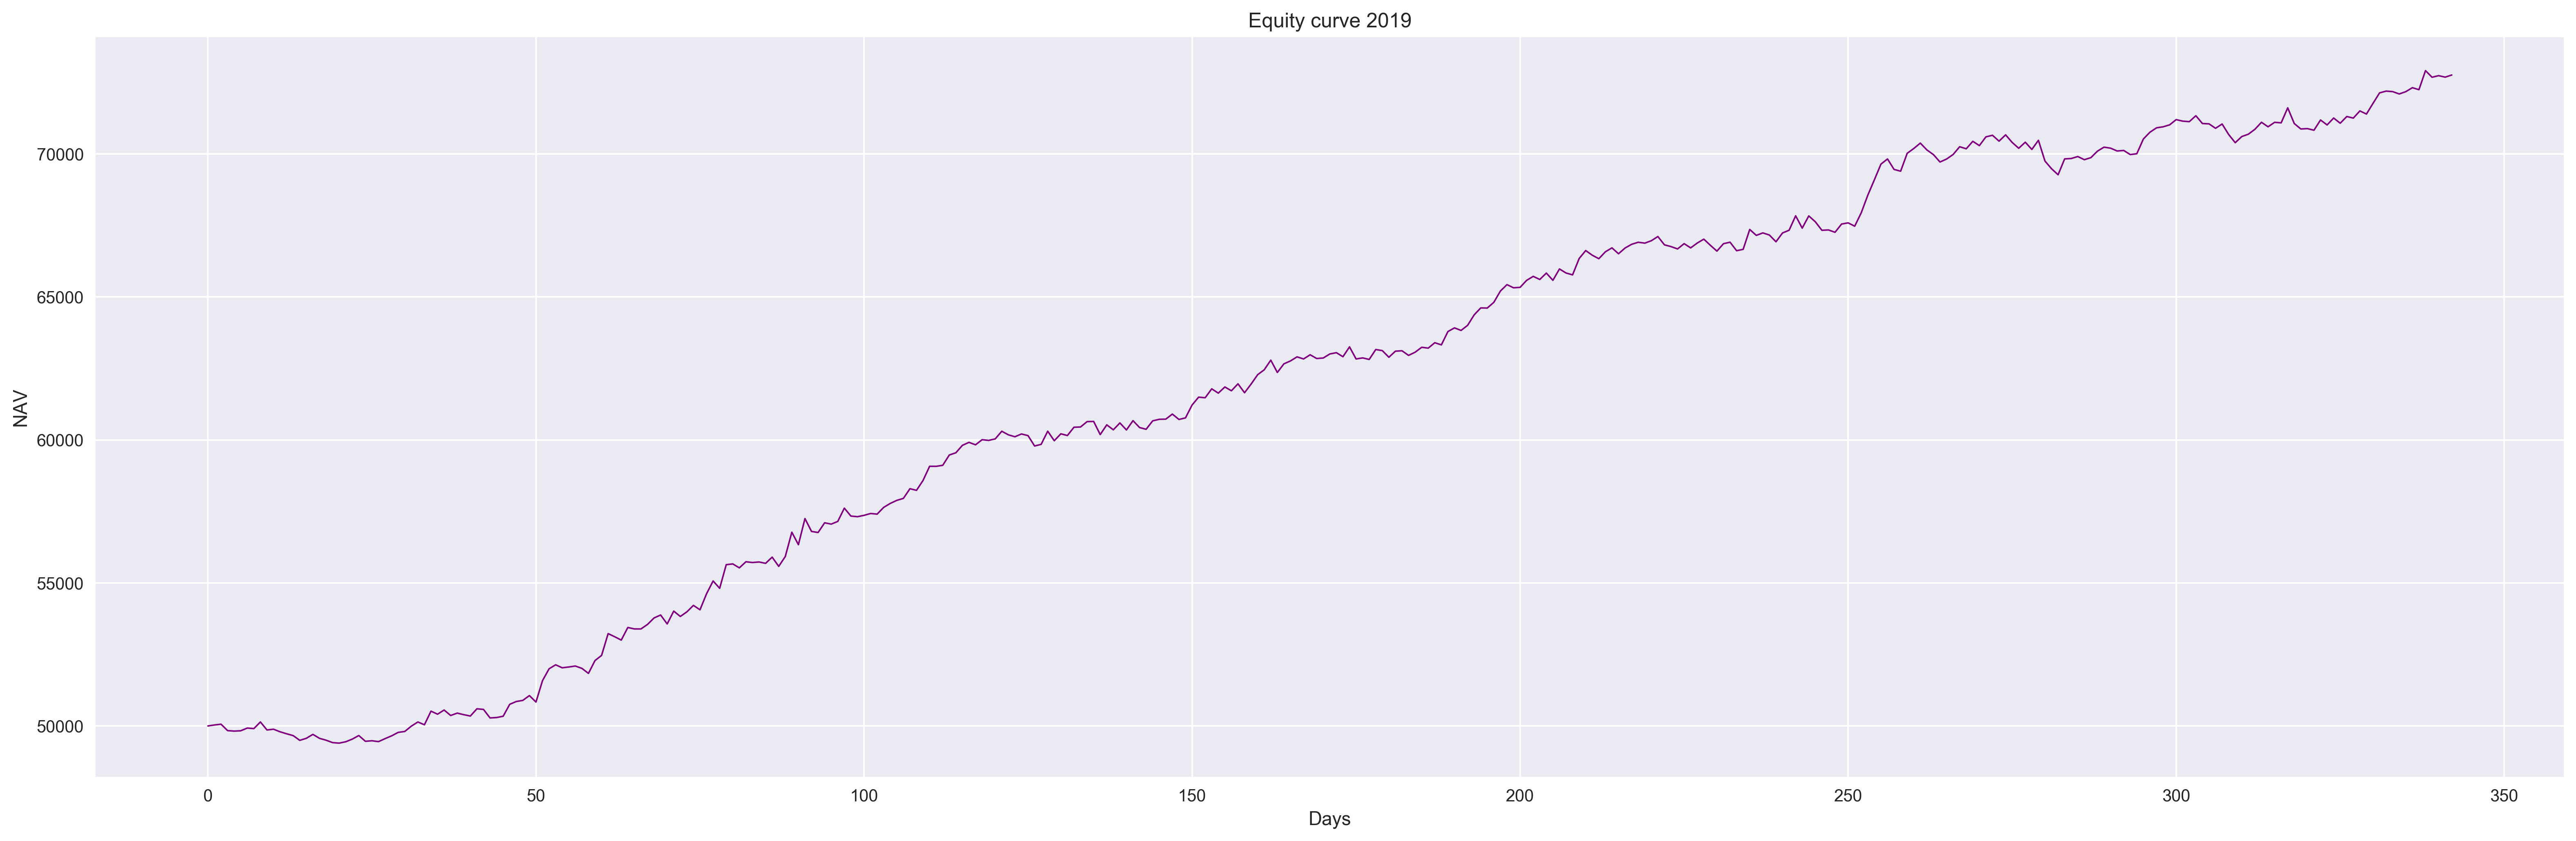

In [18]:
###################################
###### CHOUPINET!! ################
###################################


tmps55=time.time()
df = pd.read_csv('SIGNALS.csv')

try:
    df = df.drop(['Unnamed: 0'],axis=1)
except:
    pass
choupinet = pd.DataFrame()

DT = []
OL = []
CL = []
OS = []
CS = []
XP = []
PNL = []
CUM = []
YMCA = []
NETL = []
NETS = []
LAT = []
XPL = []
XPS = []
MDD = []
NXP = []

ol = 0
cl = 0
os = 0
cs = 0
xp = 0
pnl = 0
cum = 0
ymca = 0
netl = 0
nets = 0
lat = 0
xpl = 0
xps = 0
mdd = 0
nxp = 0

df.head(0)

for i in range(0,df.shape[0]-1):
    
    long = df.shape[0]-1
    
    if i == 1:
            print('\r',Fore.GREEN,' |==',Fore.BLUE,'O',Fore.RED,'==================|',end='',flush=True)
    if i == round(1 * long / 9):
        print('\r',Fore.GREEN,' |====',Fore.BLUE,'O',Fore.RED,'================|',end='',flush=True)
    if i == round(2 * long / 9):
        print('\r',Fore.GREEN,' |======',Fore.BLUE,'O',Fore.RED,'==============|',end='',flush=True)
    if i == round(3 * long / 9):
        print('\r',Fore.GREEN,' |========',Fore.BLUE,'O',Fore.RED,'============|',end='',flush=True)
    if i == round(4 * long / 9):
        print('\r',Fore.GREEN,' |==========',Fore.BLUE,'O',Fore.RED,'==========|',end='',flush=True)
    if i == round(5 * long / 9):
        print('\r',Fore.GREEN,' |============',Fore.BLUE,'O',Fore.RED,'========|',end='',flush=True)
    if i == round(6 * long / 9):
        print('\r',Fore.GREEN,' |==============',Fore.BLUE,'O',Fore.RED,'======|',end='',flush=True)
    if i == round(7 * long / 9):
        print('\r',Fore.GREEN,' |================',Fore.BLUE,'O',Fore.RED,'====|',end='',flush=True)
    if i == round(8 * long / 9):
        print('\r',Fore.GREEN,' |==================',Fore.BLUE,'O',Fore.RED,'==|',Style.RESET_ALL,end='',flush=True)
    
    
    if df.iloc[i+1,0] == df.iloc[i,0]:
        ol += df.iloc[i,2]
        cl += df.iloc[i,3]
        os += df.iloc[i,4]
        cs += df.iloc[i,5]
        if df.iloc[i,3] == 1 or df.iloc[i,5] == 1 :
            xp = xp - (df.iloc[i,6] * df.iloc[i,7])
        if df.iloc[i,2] == 1 or df.iloc[i,4] == 1 :
            xp = xp + (df.iloc[i,6] * df.iloc[i,7])
        
        try:
            cum += df.iloc[i,9]
        except:
            cum += 0
        pnl += df.iloc[i,9]
        lat += df.iloc[i,10]
        
        if df.iloc[i,2] == 1:
            xpl = xpl + (df.iloc[i,6] * df.iloc[i,7])
        if df.iloc[i,3] == 1:
            xpl = xpl - (df.iloc[i,6] * df.iloc[i,7])
        
        if df.iloc[i,4] == 1:
            xps = xps  -(df.iloc[i,6] * df.iloc[i,7])
        if df.iloc[i,5] == 1:
            xps = xps + (df.iloc[i,6] * df.iloc[i,7])
        
        
        nxp =xpl+  xps
        
    else:
        
        ymca = 50000 + cum +lat
        netl = netl + ol - cl
        nets = nets + os - cs
        DT.append(df.iloc[i-1,0])
        OL.append(ol)
        CL.append(cl)
        OS.append(os)
        CS.append(cs)
        XP.append(xp)
        PNL.append(pnl)
        CUM.append(cum)
        YMCA.append(ymca)
        NETL.append(netl)
        NETS.append(nets)
        LAT.append(lat)
        if min(LAT) < 0:
             mdd = min(LAT)
        XPL.append(xpl)
        XPS.append(xps)
        MDD.append(mdd)
        NXP.append(nxp)
        ol = 0
        cl = 0
        os = 0
        cs = 0
        pnl = 0
        lat = 0
        mdd = 0

choupinet['Date'] = DT
choupinet['Open Long'] = OL
choupinet['Close Long'] = CL
choupinet['Open Short'] = OS
choupinet['Close Short'] = CS
choupinet['Exposure Long'] = XPL
choupinet['Exposure Short'] = XPS
choupinet['Exposure'] = XP
choupinet['Net Exposure'] = NXP
choupinet['PNL'] = PNL
choupinet['Unrealized PNL'] = LAT
choupinet['Cumulative PNL'] = CUMULGLOB
choupinet['NAV'] = YMCA
choupinet['Net Long'] = NETL
choupinet['Net Short'] = NETS
choupinet['Maximum Drawdown'] = MDD

choupinet.to_csv('portfolio_2019.csv')

plt.figure(figsize=(26,8),dpi=300)
plt.title('Equity curve 2019')
plt.ylabel('NAV')
plt.xlabel('Days')
plt.plot(choupinet['NAV'],color='purple',lw=0.9)
plt.savefig('nav_2019.png')
tmps22=round(time.time()-tmps55,2)
print(Fore.BLUE,"/n Time for completing Choupinetisation Generation = %f" %tmps22,'seconds \n',Style.RESET_ALL)
choupinet.tail()

In [19]:
len(CUMULGLOB),len(LAT)

(343, 343)

In [20]:
signals[signals['Date']=='2019-12-10']['Close Long'].sum(),signals[signals['Date']=='2019-12-10']['Open Long'].sum(),\
signals[signals['Date']=='2019-12-10']['Close Short'].sum(),signals[signals['Date']=='2019-12-10']['Open Short'].sum()

(0, 0, 0, 0)

In [21]:
Resultats[Resultats['Date']=='2019-12-10']['Green_Close'].sum(),Resultats[Resultats['Date']=='2019-12-10']['Green'].sum(),\
Resultats[Resultats['Date']=='2019-12-10']['Red_Close'].sum(),Resultats[Resultats['Date']=='2019-12-10']['Red'].sum()

(66, 10, 13, 58)

In [22]:
choupinet['Unrealized PNL'].min()

-1702.8500000000001

In [23]:
choupinet

,Date,Open Long,Close Long,Open Short,Close Short,Exposure Long,Exposure Short,Exposure,Net Exposure,PNL,Unrealized PNL,Cumulative PNL,NAV,Net Long,Net Short,Maximum Drawdown
0,2018-07-30,8,0,20,0,11957.59,-29885.00,41842.59,-17927.41,0.00,0.00,0.00,50000.00,8,20,0.00
1,2018-07-31,0,0,1,1,11957.59,-29832.32,41789.91,-17874.73,-18.20,52.62,35.92,50034.42,8,20,0.00
2,2018-08-01,2,0,1,0,14964.18,-31358.30,46322.48,-16394.12,0.00,79.19,0.00,50060.99,10,21,0.00
3,2018-08-02,0,0,1,3,14964.18,-28401.12,43365.30,-13436.94,-14.29,-130.79,-14.29,49836.72,10,19,-130.79
4,2018-08-03,1,0,3,1,16395.28,-31323.49,47718.77,-14928.21,-85.44,-62.09,-85.44,49819.98,11,21,-130.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2019-12-02,0,1,0,3,-2608.97,-32221.19,29612.22,-34830.16,187.34,-339.10,293.25,72909.92,5,13,-1702.85
339,2019-12-03,1,2,1,2,-4057.78,-30878.49,26820.71,-34936.27,93.66,-663.78,93.66,72678.90,4,12,-1702.85
340,2019-12-04,2,1,0,1,-2561.83,-29483.19,26921.36,-32045.02,113.50,-721.56,113.50,72734.62,5,11,-1702.85
341,2019-12-05,0,0,1,1,-2561.83,-29502.91,26941.08,-32064.74,6.20,-779.69,6.20,72682.69,5,11,-1702.85
